# Finite Difference Method
This note book illustrates the finite different method for a Boundary Value Problem.
### Example Boudary Value Problem
Consider the boundary value problem
$$  \frac{d^2 y}{dx^2} + 2x\frac{dy}{dx}+y=3x^2,$$
with the boundary conditions
$$ y(0)=1,  y(1)=2. $$


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
from IPython.core.display import HTML

def _repr_html_(self):
    html = ["<table>"]
    for row in self:
        html.append("<tr>")

        for col in row:
            html.append("<td>{0}</td>".format(col))

        html.append("</tr>")
    html.append("</table>")
    return ''.join(html)
from IPython.display import HTML    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Discrete Axis
The stepsize is defined as
$$h=\frac{b-a}{N}$$
here it is 
$$h=\frac{1-0}{10}$$
giving 
$$x_i=0+0.1 i$$
for $i=0,1,...10.$

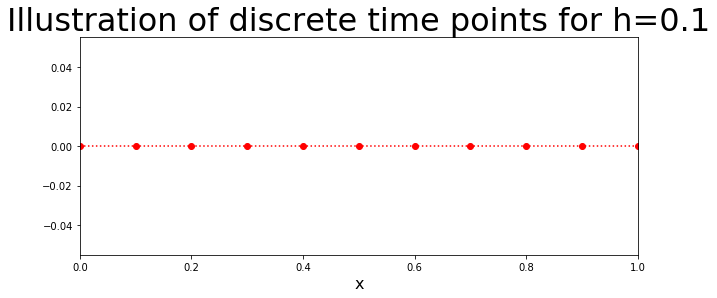

In [2]:
## BVP
N=10
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.xlim((0,1))
plt.xlabel('x',fontsize=16)
plt.title('Illustration of discrete time points for h=%s'%(h),fontsize=32)
plt.show()

## The Difference Equation
To convert the boundary problem into a difference equation we use 1st and 2nd order difference operators.

The first derivative can be approximated by the difference operators:
$$ D^{+}U_{i}=\frac{U_{i+1}-U_{i}}{h_{i+1}} \ \ \ \mbox{ Forward,} $$
$$ D^{-}U_{i}=\frac{U_{i}-U_{i-1}}{h_i} \ \ \ \mbox{ Backward,} $$
or
$$D^{0}U_{i}=\frac{U_{i+1}-U_{i-1}}{x_{i+1}-x_{i-1}} \ \ \ \mbox{ Centered.} $$
The second derivative can be approxiamed 
$$\delta_x^{2}U_{i}=\frac{2}{x_{i+1}-x_{i-1}}\left(\frac{U_{i+1}-U_{i}}{x_{i+1}-x_{i}}-\frac{U_{i}-U_{i-1}}{x_{i}-x_{i-1}}\right)=\frac{U_{i+1}-2U_{2}+U_{i-1}}{h^2} \ \ \ \mbox{ Centered in $x$ direction} $$

The general difference equation is
$$  \frac{d^2 y}{dx^2} + \frac{dy}{dx}+y=3x,$$

$$ \frac{1}{h^2}\left(y_{i-1}-2y_i+y_{i+1}\right)+\frac{y_{i-1}-y_{i+1}}{2h}+y_i=3x_i \ \ \ i=1,..,N-1. $$

Rearranging the equation we have the system of N-1 equations
$$i=1: (\frac{1}{0.1^2}+\frac{2x_1}{0.2})\color{green}{y_{0}} -\left(\frac{2}{0.1^2}-1\right)y_1 +(\frac{2x_1}{0.1^2}+\frac{1}{0.2}) y_{2}=3x_1^2$$
$$i=2: (\frac{1}{0.1^2}+\frac{2x_2}{0.2})y_{1} -\left(\frac{2}{0.1^2}-1\right)y_2 +(\frac{1}{0.1^2}+\frac{2x_2}{0.2}) y_{3}=3x_2^2$$
$$ ...$$
$$i=8: (\frac{1}{0.1^2}+\frac{2x_8}{0.2})y_{7} -\left(\frac{2}{0.1^2}-1\right)y_8 +(\frac{1}{0.1^2}+\frac{2x_8}{0.2})y_{9}=3x_8^2$$
$$i=9: (\frac{1}{0.1^2}+\frac{2x_9}{0.2})y_{8} -\left(\frac{2}{0.1^2}-1\right)y_9 +(\frac{1}{0.1^2}+\frac{2x_9}{0.2}) \color{green}{y_{10}}=3x_9^2$$
where the green terms are the known boundary conditions.

Rearranging the equation we have the system of 9 equations
$$i=1:  -\left(\frac{2}{0.1^2}-1\right)y_1 +(\frac{1}{0.1^2}+\frac{2x_1}{0.2})y_{2}=-(\frac{1}{0.1^2}+\frac{2x_1}{0.2})\color{green}{y_{0}}+3x_1^2$$
$$i=2: (\frac{1}{0.1^2}+\frac{2x_2}{0.2})y_{1} -\left(\frac{2}{0.1^2}-1\right)y_2 +(\frac{1}{0.1^2}+\frac{2x_2}{0.2}) y_{3}=3x_2^2$$
$$ ...$$
$$i=8: (\frac{1}{0.1^2}+\frac{2x_8}{0.2})y_{7} -\left(\frac{2}{0.1^2}-1\right)y_8 +(\frac{1}{0.1^2}+\frac{2x_8}{0.2}) y_{9}=3x_8^2$$
$$i=9: (\frac{1}{0.1^2}+\frac{2x_9}{0.2})y_{8} -\left(\frac{2}{0.1^2}-1\right)y_9 =-(\frac{1}{0.1^2}+\frac{2x_9}{0.2}) \color{green}{y_{10}}+3x_9^2$$
where the green terms are the known boundary conditions.
This is system can be put into matrix form 
$$  A\color{red}{\mathbf{y}}=\mathbf{b} $$
Where A is a $9\times 9 $ matrix of the form

which can be represented graphically as:

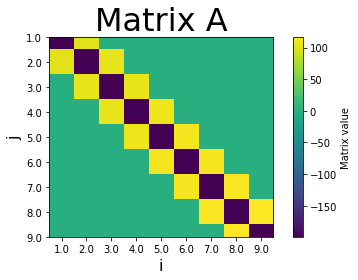

In [3]:
A=np.zeros((N-1,N-1))
# Diagonal
for i in range (0,N-1):
    A[i,i]=-(2/(h*h)-1)

for i in range (0,N-2):           
    A[i+1,i]=1/(h*h)+2*(i+1)*h/(2*h)
    A[i,i+1]=1/(h*h)+2*(i+1)*h/(2*h)
    
plt.imshow(A)
plt.xlabel('i',fontsize=16)
plt.ylabel('j',fontsize=16)
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
plt.title('Matrix A',fontsize=32)
plt.tight_layout()
plt.subplots_adjust()
plt.show()

$\mathbf{y}$ is the unknown vector which is contains the numerical approximations of the $y$. 
$$
\color{red}{\mathbf{y}}=\color{red}{
\left(\begin{array}{c} y_1\\
y_2\\
y_3\\
.\\
.\\
y_8\\
y_9
\end{array}\right).}
$$

In [4]:
y=np.zeros((N+1))
# Boundary Condition
y[0]=1
y[N]=2

and the known right hand side is a known $9\times 1$ vector with the boundary conditions
$$
\mathbf{b}=\left(\begin{array}{c}-101+3x_1^2\\
3x_2^2\\
3x_3^2\\
.\\
.\\
3x_8^2\\
-218+3x_9^2 \end{array}\right)
$$


In [5]:
b=np.zeros(N-1)
for i in range (0,N-1):
    b[i]=3*h*(i+1)*h*(i+1)
# Boundary Condition
b[0]=-y[0]*(1/(h*h)+1/(2*h))+b[0]
b[N-2]=-y[N]*(1/(h*h)+1/h)+b[N-2]


## Solving the system
To solve invert the matrix $A$ such that 
$$A^{-1}Ay=A^{-1}b$$
$$y=A^{-1}b$$
The plot below shows the graphical representation of $A^{-1}$.

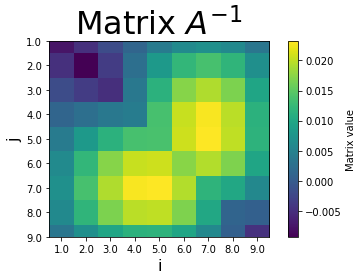

In [6]:
invA=np.linalg.inv(A)

plt.imshow(invA)
plt.xlabel('i',fontsize=16)
plt.ylabel('j',fontsize=16)
plt.yticks(np.arange(N-1), np.arange(1,N-0.9,1))
plt.xticks(np.arange(N-1), np.arange(1,N-0.9,1))
clb=plt.colorbar()
clb.set_label('Matrix value')
plt.title(r'Matrix $A^{-1}$',fontsize=32)
plt.tight_layout()
plt.subplots_adjust()
plt.show()


y[1:N]=np.dot(invA,b)

## Result 
The plot below shows the approximate solution of the Boundary Value Problem (blue v).

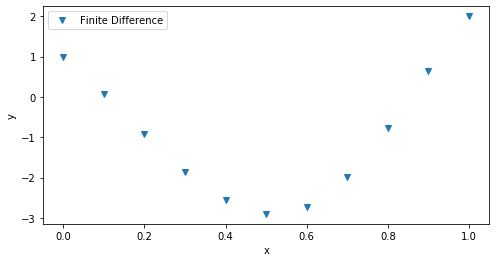

In [7]:
fig = plt.figure(figsize=(8,4))

plt.plot(x,y,'v',label='Finite Difference')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()